In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
pokemon = pd.read_csv('Pokemon.csv')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
pokemon.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [13]:
print(pokemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


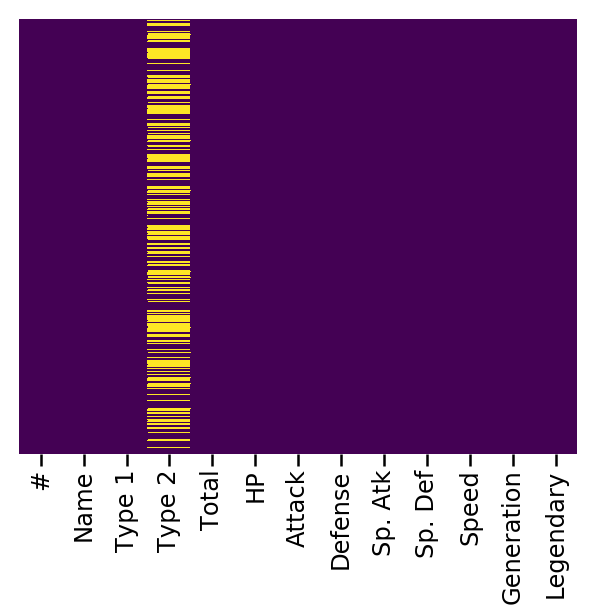

In [14]:
sns.set_context('poster',font_scale=1.1)
plt.figure(figsize=(10,8))
sns.set_context(font_scale=1.3)
sns.heatmap(pokemon.isnull(),yticklabels=False,cbar=False, cmap='viridis')

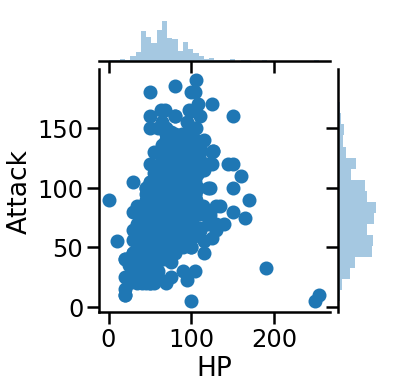

In [15]:
sns.jointplot(x="HP", y="Attack", data=pokemon)

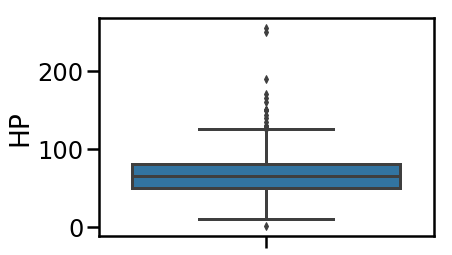

In [16]:
sns.boxplot(y="HP", data=pokemon);

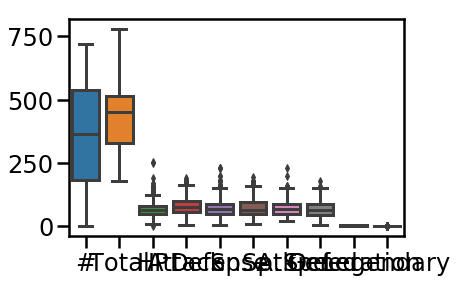

In [17]:
sns.boxplot(data=pokemon);

In [18]:
pokemon.rename(columns={'Type 1': 'Type'}, inplace=True)

In [19]:
pokemon.drop(['Type 2','#','Name'], axis=1,inplace=True)

In [20]:
pokemon.head()

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,False
1,Grass,405,60,62,63,80,80,60,1,False
2,Grass,525,80,82,83,100,100,80,1,False
3,Grass,625,80,100,123,122,120,80,1,False
4,Fire,309,39,52,43,60,50,65,1,False


In [21]:
pokemon.Type.unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [22]:
pokemon['Type']=pd.factorize(pokemon['Type'])[0]

In [23]:
pokemon.head()

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,318,45,49,49,65,65,45,1,False
1,0,405,60,62,63,80,80,60,1,False
2,0,525,80,82,83,100,100,80,1,False
3,0,625,80,100,123,122,120,80,1,False
4,1,309,39,52,43,60,50,65,1,False


In [24]:
#pokemon[['Type', 'Legendary']].groupby(['Type'], as_index=False).mean().sort_values(by='Legendary', ascending=False)

### Split Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = pokemon.drop('Legendary',axis=1)
y = pokemon['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32)

In [27]:
X.head(5)

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,0,318,45,49,49,65,65,45,1
1,0,405,60,62,63,80,80,60,1
2,0,525,80,82,83,100,100,80,1
3,0,625,80,100,123,122,120,80,1
4,1,309,39,52,43,60,50,65,1


In [28]:
y.head(5)

0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logreg = LogisticRegression()

In [31]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
logistic_predictions = logreg.predict(X_test)
logistic_predictions

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
logreg.score(X_test, y_test)

0.94140625

In [35]:
print(confusion_matrix(y_test,logistic_predictions))

[[239   1]
 [ 14   2]]


In [36]:
print(classification_report(y_test,logistic_predictions))

             precision    recall  f1-score   support

      False       0.94      1.00      0.97       240
       True       0.67      0.12      0.21        16

avg / total       0.93      0.94      0.92       256



### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=160)

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
rfc_pred = rfc.predict(X_test)

In [41]:
print(rfc.score(X_test, y_test))
print("-"*60)
print(confusion_matrix(y_test,rfc_pred))
print("-"*60)
print(classification_report(y_test,rfc_pred))      

0.95703125
------------------------------------------------------------
[[236   4]
 [  7   9]]
------------------------------------------------------------
             precision    recall  f1-score   support

      False       0.97      0.98      0.98       240
       True       0.69      0.56      0.62        16

avg / total       0.95      0.96      0.95       256



### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtree = DecisionTreeClassifier()

In [44]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
dtree_predictions = dtree.predict(X_test)

In [46]:
print(dtree.score(X_test, y_test))
print("-"*60)
print(confusion_matrix(y_test,dtree_predictions))
print("-"*60)
print(classification_report(y_test,dtree_predictions))

0.97265625
------------------------------------------------------------
[[237   3]
 [  4  12]]
------------------------------------------------------------
             precision    recall  f1-score   support

      False       0.98      0.99      0.99       240
       True       0.80      0.75      0.77        16

avg / total       0.97      0.97      0.97       256



### K Nearest Neighbours

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=2)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [50]:
knn_predictions = knn.predict(X_test)

In [51]:
print(knn.score(X_test, y_test))
print("-"*60)
print(confusion_matrix(y_test,knn_predictions))
print("-"*60)
print(classification_report(y_test,knn_predictions))

0.97265625
------------------------------------------------------------
[[239   1]
 [  6  10]]
------------------------------------------------------------
             precision    recall  f1-score   support

      False       0.98      1.00      0.99       240
       True       0.91      0.62      0.74        16

avg / total       0.97      0.97      0.97       256



In [52]:
### Choosing K Value

In [53]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

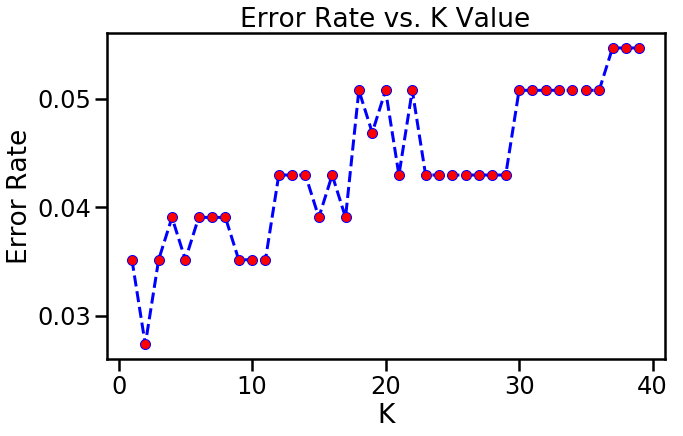

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
pokemon.jointplot(x="HP", y="Attack", data=pkmn);

AttributeError: 'DataFrame' object has no attribute 'jointplot'